## Simple Linear Regression to predict Student Grades. 


We are going to use simple linear regression to predict student grades using their study hours. 

## Loading Relevant Libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
import statsmodels.api as stats
import warnings
warnings.filterwarnings("ignore")

## Import file

In [4]:
grades_df = pd.read_csv("../Regression/score.csv")

## Assess Data

In [5]:
grades_df.shape

(25, 2)

In [6]:
grades_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [7]:
grades_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


There are two numerical variables and 25 Observations in this dataset. 

In [8]:
grades_df.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [9]:
grades_df.isna().sum()

Hours     0
Scores    0
dtype: int64

There are no null or empty values in the dataset. 

## Visualizing the data

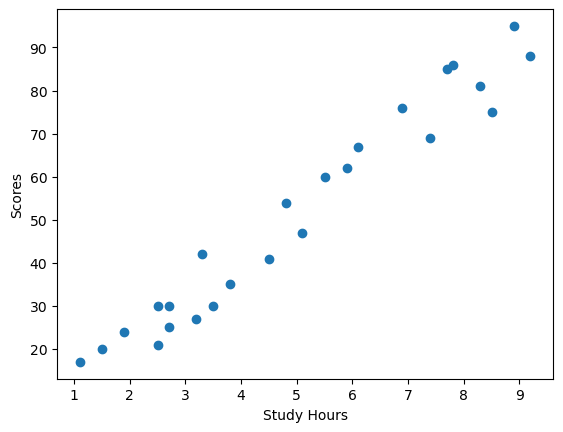

In [10]:
plot.scatter(grades_df.Hours, grades_df.Scores)
plot.xlabel('Study Hours')
plot.ylabel('Scores')
plot.show()

We can see that there could be some relationship between the input variable and the Target variable. 

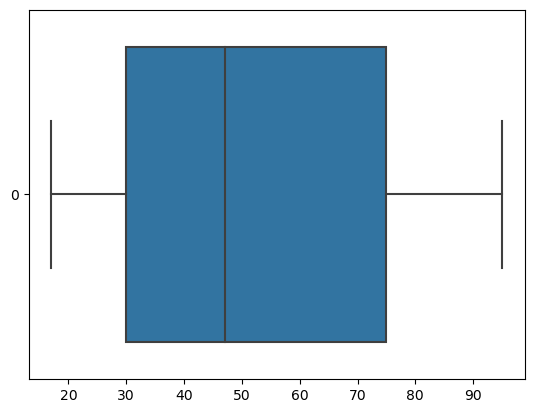

count    25.000000
mean     51.480000
std      25.286887
min      17.000000
25%      30.000000
50%      47.000000
75%      75.000000
max      95.000000
Name: Scores, dtype: float64


In [34]:
sns.boxplot(grades_df.Scores, orient = 'h')
plot.show()
print(grades_df['Scores'].describe())

## Train and Test data 

Here, we are going to split the dataset into testing and Training dataset; Allocating 70% to the training data and 30% to the testing dataset

In [11]:
train_df = grades_df.sample(frac=0.7, random_state=99) 
test_df = grades_df.drop(train_df.index)

In [12]:
train_df.shape

(18, 2)

In [13]:
test_df.shape

(7, 2)

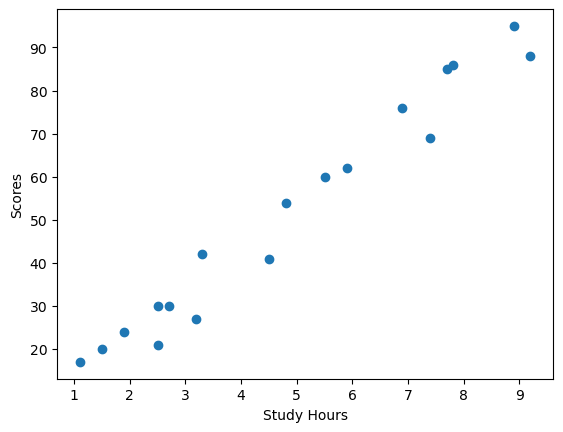

In [14]:
plot.scatter(train_df.Hours, train_df.Scores)
plot.xlabel('Study Hours')
plot.ylabel('Scores')
plot.show()

## Fit the Regression Model

Using Statsmodels, we will fit a regression line and then use OLS to create the model.

In [15]:
Y_train = train_df.Scores
X_train = stats.add_constant(train_df.Hours)

In [18]:
model_scores = stats.OLS(Y_train, X_train)
results_scores = model_scores.fit()

In [37]:
print(results_scores.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.966
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     450.1
Date:                Tue, 04 Jul 2023   Prob (F-statistic):           3.84e-13
Time:                        10:10:15   Log-Likelihood:                -53.883
No. Observations:                  18   AIC:                             111.8
Df Residuals:                      16   BIC:                             113.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2480      2.575      1.261      0.2

In [21]:
intercept_scores = results_scores.params[0]
hours_coeff = results_scores.params[1]
ssr_scores = results_scores.ssr

print('The intercept value is {:.3f}'.format(intercept_scores))
print('The coefficient (slope) for the study hours independent variable is {:.3f}'.format(hours_coeff))
print('The sum of square residuals is {:.1f}'.format(ssr_scores))

The intercept value is 3.248
The coefficient (slope) for the study hours independent variable is 9.949
The sum of square residuals is 419.7


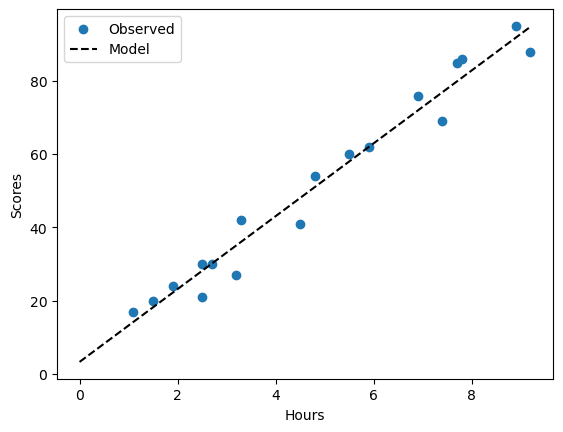

In [22]:
x_synthetic = np.linspace(0,train_df.Hours.max(), 50)
y_pred_scores = hours_coeff*x_synthetic + intercept_scores
plot.scatter(train_df.Hours, train_df.Scores, label='Observed')
plot.plot(x_synthetic, y_pred_scores, color='k', ls='--', label='Model')
plot.xlabel('Hours')
plot.ylabel('Scores')
plot.legend()
plot.show()

Our model does an okay job at explaining the variations in student scores. 

## Apply to Test data

In [23]:
Y_test = grades_df.Scores
X_test = stats.add_constant(grades_df.Hours)

In [24]:
test_predictions = results_scores.predict(X_test)

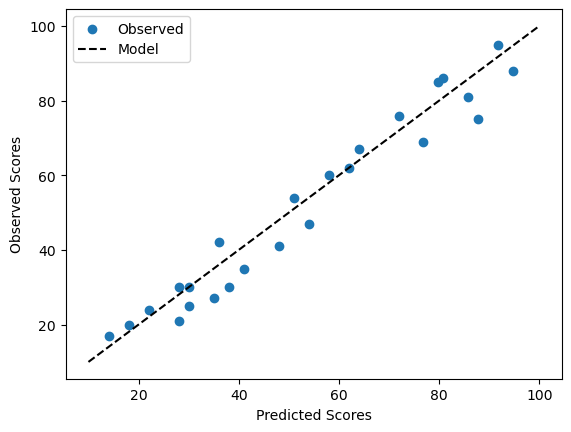

In [25]:
plot.scatter(test_predictions, Y_test, label='Observed')
plot.plot([10, 100], [10, 100], c='k', ls='--', label='Model')
plot.xlabel('Predicted Scores')
plot.ylabel('Observed Scores')
plot.legend()
plot.show()

From here, we can see that there are some variations that cannot be explained by the model. Hence, more independent variables need to be added for more accurate results.

## Residuals

In [26]:
results_scores.resid

10    5.145743
17    1.849143
12   -7.017898
20   -0.109947
21    2.997443
2    -8.084378
19   -7.869598
13    5.920736
6    -6.777550
0    -7.120174
11    0.053695
16    1.879826
15    3.207109
23    4.104833
14    2.808232
7     2.033240
24    5.150857
5     1.828688
dtype: float64

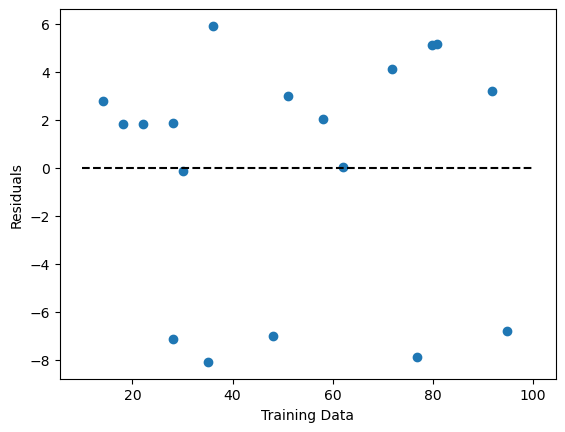

In [27]:
plot.scatter(results_scores.fittedvalues, results_scores.resid)
plot.plot([10,100], [0,0], c='k', ls='--')
plot.xlabel('Training Data')
plot.ylabel('Residuals')
plot.show()

The data is unbiased as it satisfies the zero mean error assumption, furthermore, we can observe randomness in the data. 

## Evaluate Model

We are going to evaluate our model using several metrices such as Mean Square Error (MSE), Root Mean Square Error (RMSE), Mean Absolute Error (MAE), R2 and Adjusted R2 

In [28]:
train_mse = stats.tools.eval_measures.mse(Y_train, results_scores.fittedvalues)
print('The training dataset mean square error is {}'.format(train_mse.round(1)))

The training dataset mean square error is 23.3


In [66]:
train_rmse = stats.tools.eval_measures.rmse(Y_train, results_scores.fittedvalues)
print('The training dataset root mean square error is {}'.format(train_rmse.round(1)))

The training dataset root mean square error is 4.8


In [67]:
train_mae = stats.tools.eval_measures.meanabs(Y_train, results_scores.fittedvalues)
print('The training dataset mean absolute error is {}'.format(train_mae.round(1)))

The training dataset mean absolute error is 4.1


In [68]:
train_r2 = results_scores.rsquared
print('The training dataset coefficient of determination is {}'.format(train_r2.round(3)))

The training dataset coefficient of determination is 0.966


In [69]:
train_r2_adj = results_scores.rsquared_adj
print('The training dataset adjusted coefficient of determination is {}'.format(train_r2_adj.round(3)))

The training dataset adjusted coefficient of determination is 0.964


We can see above in the root mean square error that our predictions are typically around 4.8 marks off from the observed values and that the data explains 96.4% of the variation from the coefficient of determination.